In this module, we will explain what is parameter norm penalty

We will visualize and explain few things:
1) α increases when the norm is larger than 𝑘 in the Lagrange multiplier method for constrained optimization.
2) Parameter method vs constraints method
3) 

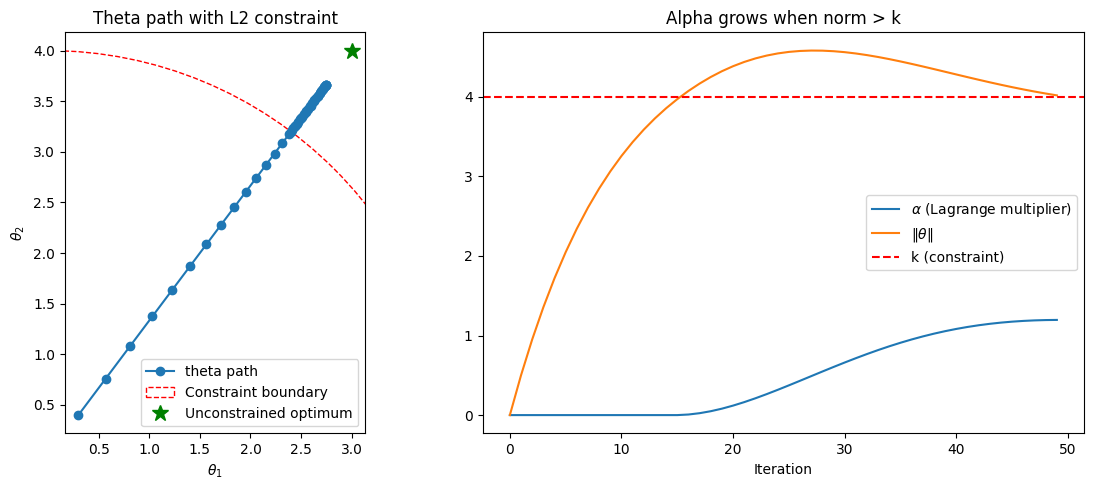

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target optimum without constraints
theta_star = np.array([3.0, 4.0])  # unconstrained optimum
k = 4.0                            # max allowed L2 norm
alpha = 0.0                        # initial Lagrange multiplier

# Learning rates
lr_theta = 0.1
lr_alpha = 0.1

# Track history
theta_hist = []
alpha_hist = []
norm_hist = []

theta = np.array([0.0, 0.0])  # start at origin

for step in range(50):
    # Compute gradients
    grad_J = theta - theta_star  # gradient of 0.5||theta - theta*||^2
    norm_theta = np.linalg.norm(theta)
    
    # Gradient of L wrt theta
    if norm_theta != 0:
        grad_L_theta = grad_J + alpha * (theta / norm_theta)
    else:
        grad_L_theta = grad_J  # avoid division by zero
    
    # Gradient of L wrt alpha (maximize over alpha)
    grad_L_alpha = norm_theta - k
    
    # Update theta (gradient descent)
    theta -= lr_theta * grad_L_theta
    
    # Update alpha (gradient ascent, but keep alpha >= 0)
    alpha += lr_alpha * grad_L_alpha
    alpha = max(alpha, 0.0)
    
    # Store history
    theta_hist.append(theta.copy())
    alpha_hist.append(alpha)
    norm_hist.append(norm_theta)

# Convert to arrays
theta_hist = np.array(theta_hist)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Path of theta
axs[0].plot(theta_hist[:,0], theta_hist[:,1], 'o-', label='theta path')
circle = plt.Circle((0,0), k, color='r', fill=False, linestyle='--', label='Constraint boundary')
axs[0].add_artist(circle)
axs[0].plot(theta_star[0], theta_star[1], 'g*', markersize=12, label='Unconstrained optimum')
axs[0].set_aspect('equal', 'box')
axs[0].set_xlabel(r'$\theta_1$')
axs[0].set_ylabel(r'$\theta_2$')
axs[0].legend()
axs[0].set_title('Theta path with L2 constraint')

# Alpha and norm over time
axs[1].plot(alpha_hist, label=r'$\alpha$ (Lagrange multiplier)')
axs[1].plot(norm_hist, label=r'$\|\theta\|$')
axs[1].axhline(k, color='r', linestyle='--', label='k (constraint)')
axs[1].set_xlabel('Iteration')
axs[1].legend()
axs[1].set_title('Alpha grows when norm > k')

plt.tight_layout()
plt.show()


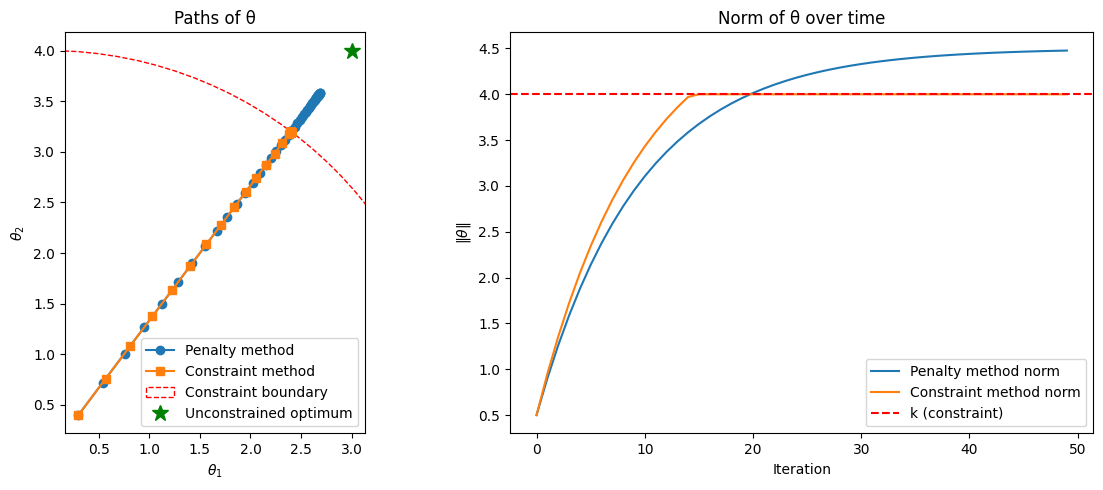

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Target optimum without constraints
theta_star = np.array([3.0, 4.0])
k = 4.0  # max allowed L2 norm

# Learning rate
lr = 0.1

# Penalty method parameters
alpha_penalty = 0.5  # fixed penalty strength

# Initialize both methods
theta_penalty = np.array([0.0, 0.0])
theta_constraint = np.array([0.0, 0.0])

# History
penalty_hist = []
constraint_hist = []
penalty_norms = []
constraint_norms = []

# Training loop
for step in range(50):
    # ----- Penalty method -----
    grad_J_penalty = theta_penalty - theta_star
    norm_penalty = np.linalg.norm(theta_penalty)
    if norm_penalty != 0:
        grad_penalty_term = alpha_penalty * (theta_penalty / norm_penalty)
    else:
        grad_penalty_term = 0
    grad_total_penalty = grad_J_penalty + grad_penalty_term
    theta_penalty -= lr * grad_total_penalty

    # ----- Constraint method -----
    grad_J_constraint = theta_constraint - theta_star
    theta_constraint -= lr * grad_J_constraint
    # Projection step
    norm_constraint = np.linalg.norm(theta_constraint)
    if norm_constraint > k:
        theta_constraint = theta_constraint * (k / norm_constraint)

    # Store history
    penalty_hist.append(theta_penalty.copy())
    constraint_hist.append(theta_constraint.copy())
    penalty_norms.append(np.linalg.norm(theta_penalty))
    constraint_norms.append(np.linalg.norm(theta_constraint))

# Convert to arrays
penalty_hist = np.array(penalty_hist)
constraint_hist = np.array(constraint_hist)

# ----- Plot paths -----
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Path plot
axs[0].plot(penalty_hist[:,0], penalty_hist[:,1], 'o-', label='Penalty method')
axs[0].plot(constraint_hist[:,0], constraint_hist[:,1], 's-', label='Constraint method')
circle = plt.Circle((0,0), k, color='r', fill=False, linestyle='--', label='Constraint boundary')
axs[0].add_artist(circle)
axs[0].plot(theta_star[0], theta_star[1], 'g*', markersize=12, label='Unconstrained optimum')
axs[0].set_aspect('equal', 'box')
axs[0].set_xlabel(r'$\theta_1$')
axs[0].set_ylabel(r'$\theta_2$')
axs[0].legend()
axs[0].set_title('Paths of θ')

# Norm over time
axs[1].plot(penalty_norms, label='Penalty method norm')
axs[1].plot(constraint_norms, label='Constraint method norm')
axs[1].axhline(k, color='r', linestyle='--', label='k (constraint)')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel(r'$\|\theta\|$')
axs[1].legend()
axs[1].set_title('Norm of θ over time')

plt.tight_layout()
plt.show()


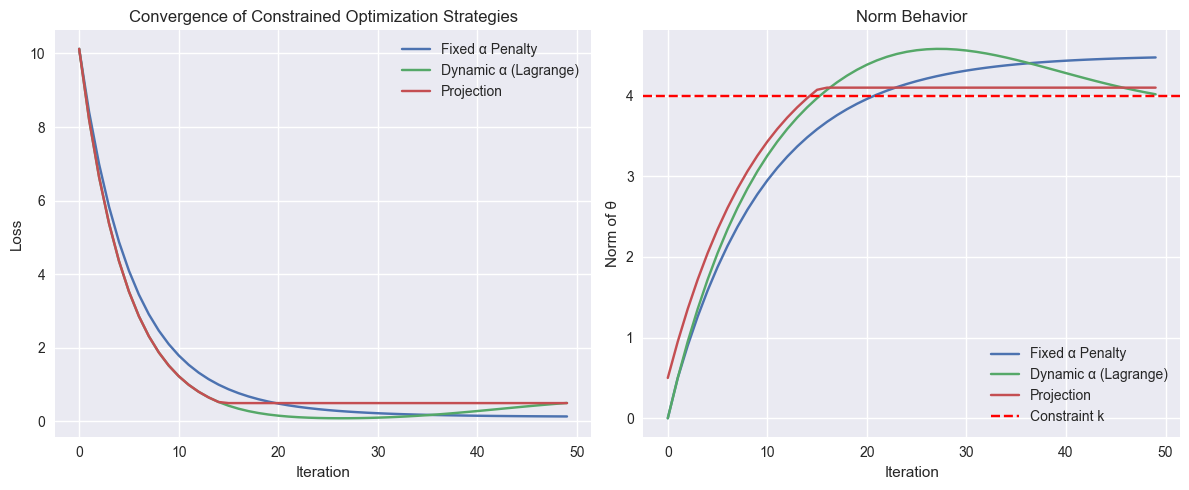

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Problem setup -----
theta_star = np.array([3.0, 4.0])  # unconstrained optimum
k = 4.0                            # max allowed L2 norm
lr = 0.1                           # learning rate
alpha_fixed = 0.5                   # fixed penalty strength

# ----- Initialize -----
theta_penalty = np.zeros(2)
theta_dynamic = np.zeros(2)
theta_proj = np.zeros(2)
alpha_dynamic = 0.0                 # starting α for dynamic method

# ----- History -----
loss_penalty_hist = []
loss_dynamic_hist = []
loss_proj_hist = []
norm_penalty_hist = []
norm_dynamic_hist = []
norm_proj_hist = []

# ----- Training loop -----
for step in range(50):
    # --- Penalty method ---
    grad_J_penalty = theta_penalty - theta_star
    norm_penalty = np.linalg.norm(theta_penalty)
    grad_penalty_term = alpha_fixed * (theta_penalty / norm_penalty) if norm_penalty != 0 else 0
    grad_total_penalty = grad_J_penalty + grad_penalty_term
    theta_penalty -= lr * grad_total_penalty

    # --- Dynamic α method ---
    grad_J_dynamic = theta_dynamic - theta_star
    norm_dynamic = np.linalg.norm(theta_dynamic)
    grad_dynamic_term = alpha_dynamic * (theta_dynamic / norm_dynamic) if norm_dynamic != 0 else 0
    grad_total_dynamic = grad_J_dynamic + grad_dynamic_term
    theta_dynamic -= lr * grad_total_dynamic
    # Update α (gradient ascent on α)
    alpha_dynamic += 0.1 * (norm_dynamic - k)
    alpha_dynamic = max(alpha_dynamic, 0.0)

    # --- Projection method ---
    grad_J_proj = theta_proj - theta_star
    theta_proj -= lr * grad_J_proj
    norm_proj = np.linalg.norm(theta_proj)
    if norm_proj > k:
        theta_proj = theta_proj * (k / norm_proj)

    # --- Record loss and norms ---
    loss_penalty_hist.append(0.5 * np.sum((theta_penalty - theta_star)**2))
    loss_dynamic_hist.append(0.5 * np.sum((theta_dynamic - theta_star)**2))
    loss_proj_hist.append(0.5 * np.sum((theta_proj - theta_star)**2))
    norm_penalty_hist.append(norm_penalty)
    norm_dynamic_hist.append(norm_dynamic)
    norm_proj_hist.append(norm_proj)

# ----- Plot results -----
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(loss_penalty_hist, label='Fixed α Penalty')
axs[0].plot(loss_dynamic_hist, label='Dynamic α (Lagrange)')
axs[0].plot(loss_proj_hist, label='Projection')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')
axs[0].set_title('Convergence of Constrained Optimization Strategies')
axs[0].legend()
axs[0].grid(True)

# Norm plot
axs[1].plot(norm_penalty_hist, label='Fixed α Penalty')
axs[1].plot(norm_dynamic_hist, label='Dynamic α (Lagrange)')
axs[1].plot(norm_proj_hist, label='Projection')
axs[1].axhline(k, color='r', linestyle='--', label='Constraint k')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Norm of θ')
axs[1].set_title('Norm Behavior')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


Difference between these three method. 
From the loss graph:
Projection drops loss quickly and reaches a low, stable value first
Dynamic alpha also converges well, but take few iterations to adjust
Fixed penalty reduces the loss steadily but more slowly.

From the norm behavior
Projection keeps the norm exactly at k, Never overshoots
Dynamic alpha starts below k, then blow up to above k, and fine tunes itself
Fixed alpha doesn't guaratee the norm will match k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


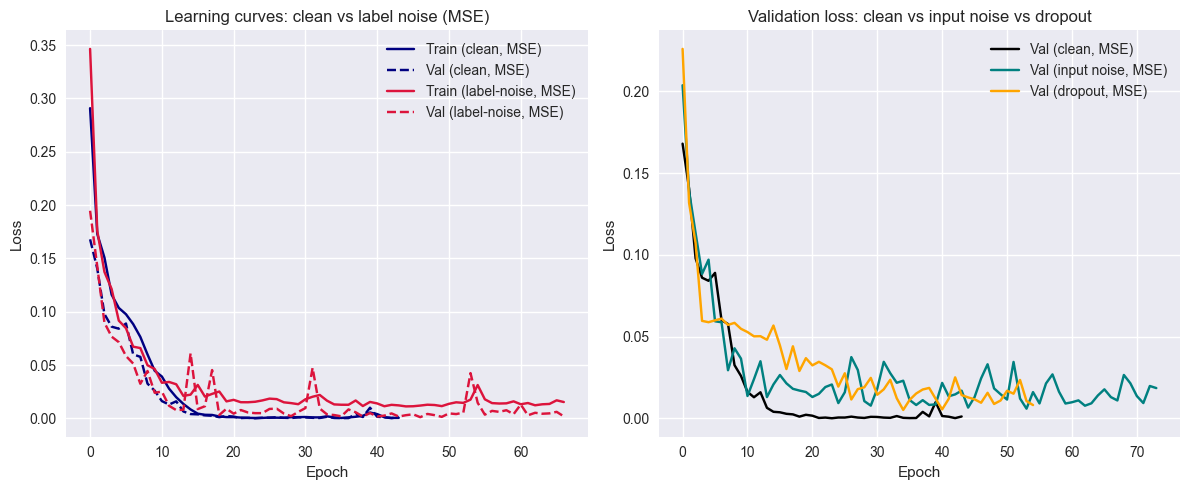

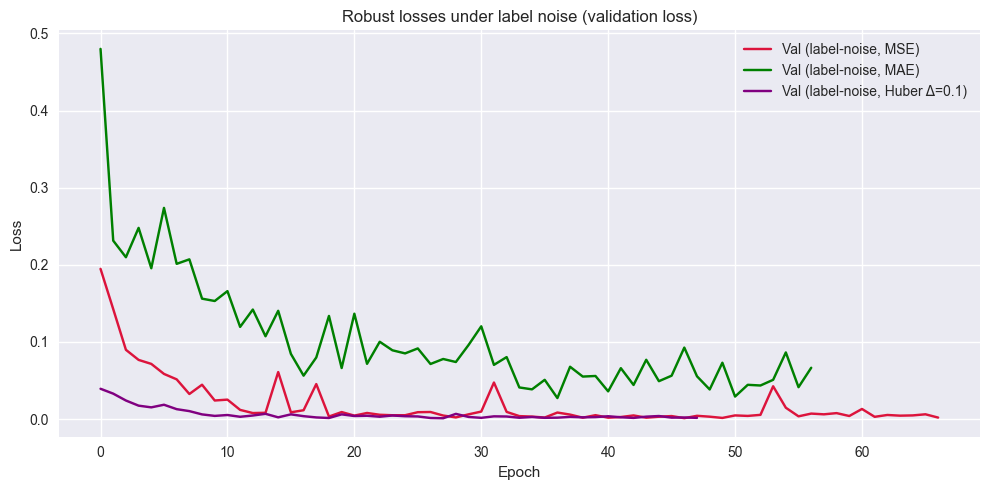

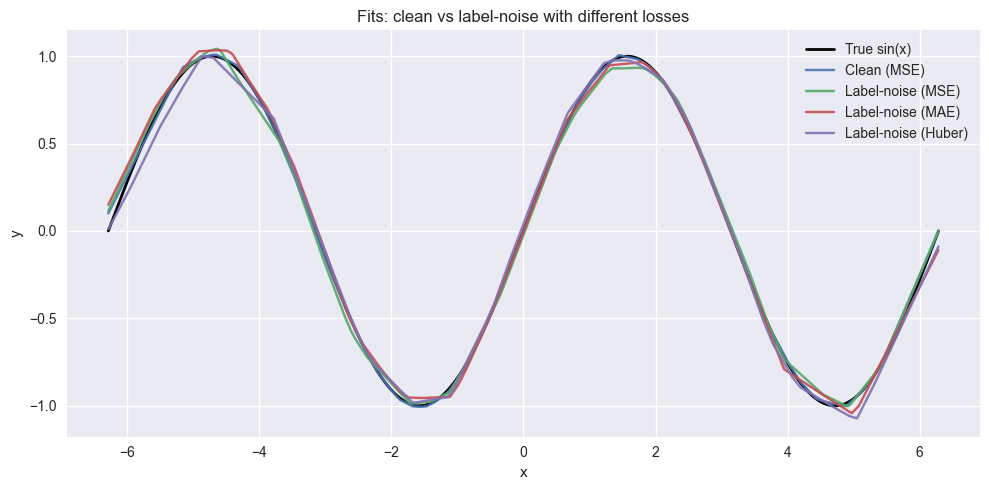

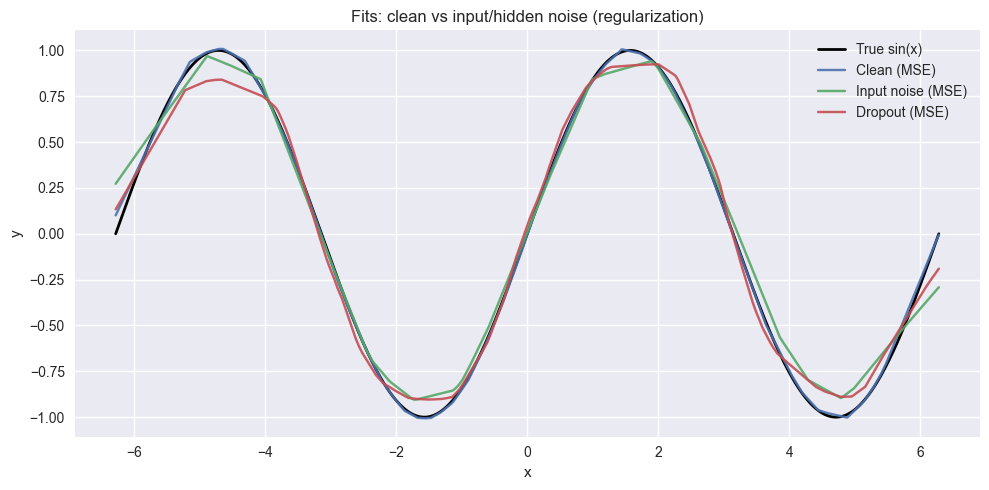

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


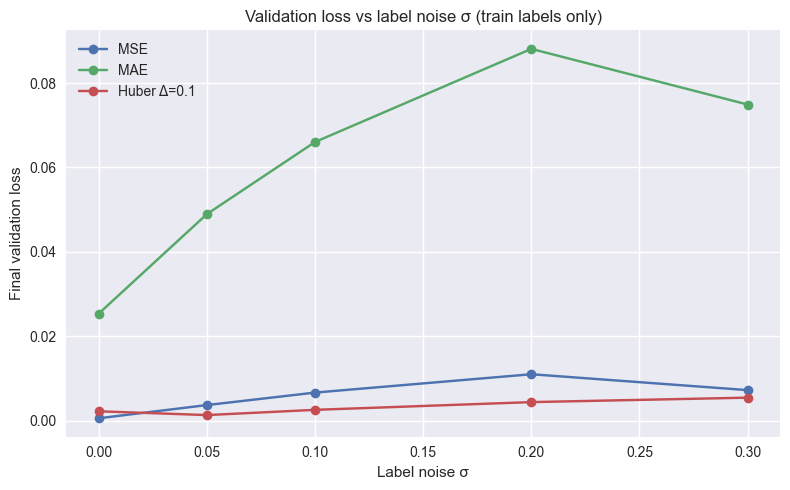

In [7]:
# 7.5 Noise robustness in deep learning — complete demo

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError, Huber
from tensorflow.keras.callbacks import EarlyStopping

# ===== 1) Data =====
rng = np.random.default_rng(42)

# True function
x_raw = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y_clean_full = np.sin(x_raw.ravel())

# Scale inputs (for stable training)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

# Train/val split ONCE; validation labels remain clean for all experiments
x_tr, x_val, y_tr_clean, y_val_clean = train_test_split(
    x_scaled, y_clean_full, test_size=0.2, random_state=42
)

# Label noise (affects training labels only)
label_noise_sigma = 0.1
y_tr_noisy = y_tr_clean + rng.normal(0, label_noise_sigma, size=y_tr_clean.shape)

# ===== 2) Model factories =====
def build_model_base(lr=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

def build_model_input_noise(lr=0.01, input_noise_std=0.1):
    model = Sequential([
        GaussianNoise(input_noise_std, input_shape=(1,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

def build_model_dropout(lr=0.01, p=0.2):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dropout(p),
        Dense(64, activation='relu'),
        Dropout(p),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

def build_model_with_loss(loss, lr=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
    return model

# ===== 3) Training utility =====
def train_model(model, x_tr, y_tr, x_val, y_val, epochs=200):
    cb = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)
    hist = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=epochs, verbose=0, callbacks=[cb])
    return hist

# ===== 4) Experiments =====
epochs = 300

# A) Clean labels (baseline, MSE)
m_clean = build_model_base()
h_clean = train_model(m_clean, x_tr, y_tr_clean, x_val, y_val_clean, epochs)

# B) Label noise (train labels noisy, MSE)
m_label_noise_mse = build_model_base()
h_label_noise_mse = train_model(m_label_noise_mse, x_tr, y_tr_noisy, x_val, y_val_clean, epochs)

# C) Input noise (GaussianNoise), clean labels
m_input_noise = build_model_input_noise(input_noise_std=0.1)
h_input_noise = train_model(m_input_noise, x_tr, y_tr_clean, x_val, y_val_clean, epochs)

# D) Hidden noise (Dropout), clean labels
m_dropout = build_model_dropout(p=0.2)
h_dropout = train_model(m_dropout, x_tr, y_tr_clean, x_val, y_val_clean, epochs)

# E) Robust losses under label noise
m_label_noise_mae = build_model_with_loss(MeanAbsoluteError())
h_label_noise_mae = train_model(m_label_noise_mae, x_tr, y_tr_noisy, x_val, y_val_clean, epochs)

m_label_noise_huber = build_model_with_loss(Huber(delta=0.1))
h_label_noise_huber = train_model(m_label_noise_huber, x_tr, y_tr_noisy, x_val, y_val_clean, epochs)

# ===== 5) Plot learning curves =====
plt.figure(figsize=(12, 5))

# Panel 1: Clean vs Label noise (MSE)
plt.subplot(1, 2, 1)
plt.plot(h_clean.history['loss'], label='Train (clean, MSE)', color='navy')
plt.plot(h_clean.history['val_loss'], label='Val (clean, MSE)', color='navy', linestyle='--')
plt.plot(h_label_noise_mse.history['loss'], label='Train (label-noise, MSE)', color='crimson')
plt.plot(h_label_noise_mse.history['val_loss'], label='Val (label-noise, MSE)', color='crimson', linestyle='--')
plt.title('Learning curves: clean vs label noise (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()

# Panel 2: Noise as regularization (input/hidden) with clean labels
plt.subplot(1, 2, 2)
plt.plot(h_clean.history['val_loss'], label='Val (clean, MSE)', color='black')
plt.plot(h_input_noise.history['val_loss'], label='Val (input noise, MSE)', color='teal')
plt.plot(h_dropout.history['val_loss'], label='Val (dropout, MSE)', color='orange')
plt.title('Validation loss: clean vs input noise vs dropout')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

# ===== 6) Plot robust losses under label noise =====
plt.figure(figsize=(10, 5))
plt.plot(h_label_noise_mse.history['val_loss'], label='Val (label-noise, MSE)', color='crimson')
plt.plot(h_label_noise_mae.history['val_loss'], label='Val (label-noise, MAE)', color='green')
plt.plot(h_label_noise_huber.history['val_loss'], label='Val (label-noise, Huber Δ=0.1)', color='purple')
plt.title('Robust losses under label noise (validation loss)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()
plt.tight_layout()
plt.show()

# ===== 7) Function fit visualization =====
def plot_predictions(models, labels, x_raw, scaler, title):
    xx = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1,1)
    xx_s = scaler.transform(xx)
    y_true = np.sin(xx.ravel())

    plt.figure(figsize=(10, 5))
    plt.plot(xx.ravel(), y_true, label='True sin(x)', color='black', linewidth=2)
    for m, lab in zip(models, labels):
        yhat = m.predict(xx_s, verbose=0).ravel()
        plt.plot(xx.ravel(), yhat, label=lab, alpha=0.9)
    plt.title(title); plt.xlabel('x'); plt.ylabel('y'); plt.grid(True); plt.legend()
    plt.tight_layout(); plt.show()

plot_predictions(
    models=[m_clean, m_label_noise_mse, m_label_noise_mae, m_label_noise_huber],
    labels=['Clean (MSE)', 'Label-noise (MSE)', 'Label-noise (MAE)', 'Label-noise (Huber)'],
    x_raw=x_raw, scaler=scaler,
    title='Fits: clean vs label-noise with different losses'
)

plot_predictions(
    models=[m_clean, m_input_noise, m_dropout],
    labels=['Clean (MSE)', 'Input noise (MSE)', 'Dropout (MSE)'],
    x_raw=x_raw, scaler=scaler,
    title='Fits: clean vs input/hidden noise (regularization)'
)

# ===== 8) Noise-level sweep (label noise on training labels only) =====
def noise_sweep(sigmas, loss='mse', epochs=150, seed=123):
    rng_local = np.random.default_rng(seed)
    val_losses = []
    for s in sigmas:
        y_tr_noisy_s = y_tr_clean + rng_local.normal(0, s, size=y_tr_clean.shape)
        m = build_model_with_loss(loss) if loss != 'mse' else build_model_base()
        h = train_model(m, x_tr, y_tr_noisy_s, x_val, y_val_clean, epochs)
        val_losses.append(h.history['val_loss'][-1])
    return np.array(val_losses)

sigmas = np.array([0.0, 0.05, 0.1, 0.2, 0.3])
vals_mse  = noise_sweep(sigmas, loss='mse')
vals_mae  = noise_sweep(sigmas, loss=MeanAbsoluteError())
vals_hubr = noise_sweep(sigmas, loss=Huber(delta=0.1))

plt.figure(figsize=(8, 5))
plt.plot(sigmas, vals_mse,  marker='o', label='MSE')
plt.plot(sigmas, vals_mae,  marker='o', label='MAE')
plt.plot(sigmas, vals_hubr, marker='o', label='Huber Δ=0.1')
plt.title('Validation loss vs label noise σ (train labels only)')
plt.xlabel('Label noise σ'); plt.ylabel('Final validation loss')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()



The above is the training under label noise (Injecting Noise at the output Targets)

In the loss and learning graph, we can clearly see that label noise degrades learning, model trained on noisy targets will exhibit higher training and validation loss, slower convergence, and greater fluctuation. Under MSE, noisy labels cause the model to chase random errors.

However, inputs and hidden noise act as effective regularizer. Adding noise to input or dropouts on hidden noises raises training loss but reduces validation loss -> Encourage flatter minima.

Two conclusions:
Preserve clean targets whenever possible. If output noise is unavoidable, favor robust losses like MAE or Huber and consider data-centric approaches (label denoising, reweighting).

Use noise injection in inputs or hidden layers (dropout, Gaussian noise, weight noise) as a principled regularization strategy to improve generalization without sacrificing supervision quality.